In [ ]:
from qcodes.dataset import(load_by_run_spec, initialise_or_create_database_at)
initialise_or_create_database_at(r'C:\Users\DebopamDatta\Documents\data\Cooldown_2024-09-17_Qinu/Cooldown-2024-09-17-C12-025-D-C12-025-O.db')

import numpy as np
import matplotlib.pyplot as plt


OperationalError: unable to open database file

In [ ]:
dataset=load_by_run_spec(captured_run_id=19)
ds=dataset.to_xarray_dataset()
ds


<xarray.Dataset> Size: 1MB
Dimensions:          (time: 26406)
Coordinates:
  * time             (time) float64 211kB 0.1279 11.15 ... 6.689e+04 6.69e+04
Data variables:
    didier_volt      (time) float64 211kB 8.07e-05 8.338e-05 ... -7.412e-08
    dieter_amp_curr  (time) float64 211kB 9.773e-09 9.791e-09 ... 9.886e-09
    keith_curr       (time) float64 211kB 1e-08 1e-08 1e-08 ... 1e-08 1e-08
    keith_volt       (time) float64 211kB 0.0003758 0.0003781 ... 9.951e-05
    temps_temp_mc    (time) float64 211kB 295.2 295.2 295.1 ... 0.03054 0.03054
Attributes: (12/19)
    ds_name:                                results
    sample_name:                            C12_025_D & C12_025_O
    exp_name:                               R monitor
    snapshot:                               {"station": {"instruments": {"kei...
    guid:                                   aaaaaaaa-0000-0000-0000-0192002f788f
    run_timestamp:                          2024-09-17 15:32:44
    ...                                     ...
    completed_timestamp_raw:                1726646864.2185802
    __main__:                               import __main__\n\nfrom utils.loa...
    main_resistance_pna_cooldown_monitor:   ''' The program monitors a 4point...
    setup_resistance_pna_cooldown_monitor:  # small code made by Felix and Sa...
    git_hash:                               a76b646ae0805759f0534f036ec3e8dd0...
    measurement_exception:                  Traceback (most recent call last)...

In [14]:
curr=ds.data_vars['keith_curr'].data
v_c= ds.data_vars['keith_volt'].data
v_s= ds.data_vars['didier_volt'].data
t = ds.coords['time'].data
Temp = ds.data_vars['temps_temp_mc'].data

Text(0, 0.5, 'Resistance [ohm]')

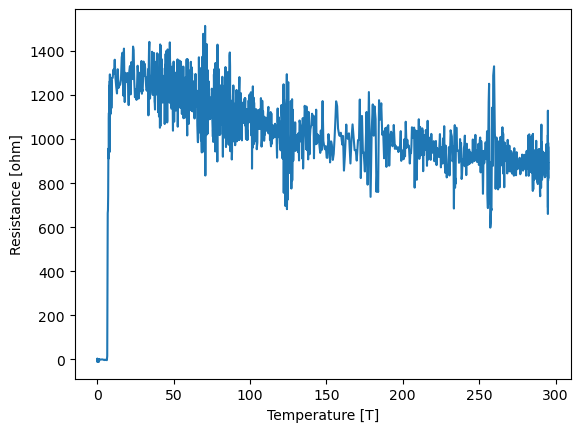

In [15]:
plt.plot(Temp, v_s/curr/9) #factor 9 is coming from the geometry of L=900um and W=100um
ax = plt.gca()
ax.set_xlabel('Temperature [T]')
ax.set_ylabel('Resistance [ohm]')

Text(0, 0.5, 'Resistance [ohm]')

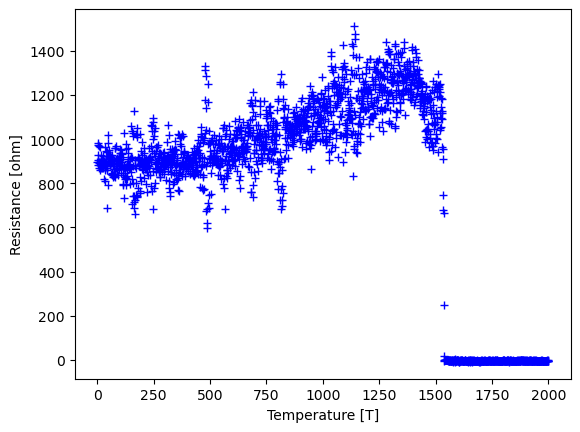

In [16]:
plt.plot(v_s[:2000]/curr[:2000]/9, 'b+') #trying to get the number of points needs to see the transition
ax = plt.gca()
ax.set_xlabel('Temperature [T]')
ax.set_ylabel('Resistance [ohm]')

Text(0, 0.5, 'Resistance [ohm]')

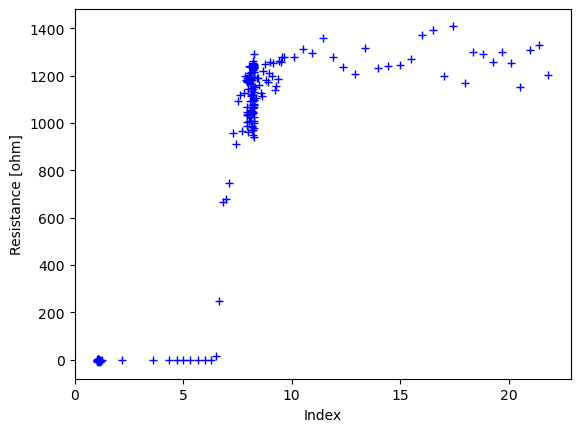

In [17]:
plt.plot(Temp[1400:1600], v_s[1400:1600]/curr[1400:1600]/9, 'b+') # zoom in to extract the sheet resistance value
ax = plt.gca()
ax.set_xlabel('Index')
ax.set_ylabel('Resistance [ohm]')

131887.63425425038
-84344.2965809884
8.261004
8.256337


Text(0, 0.5, 'direvative')

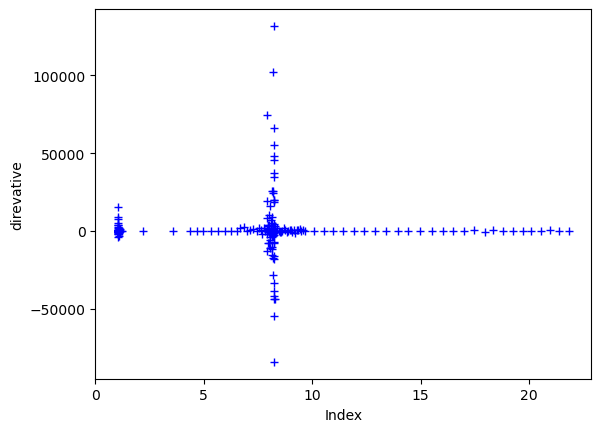

In [18]:
R = v_s[1400:1600]/curr[1400:1600]/9
T = Temp[1400:1600]
dR = np.diff(R,n=1)
dT = np.diff(T,n=1)

dRdT = dR/dT
print(np.max(dRdT)) #getting maximum value of dRdT
print(np.min(dRdT)) #getting minimum value of dRdT
print(T[np.argmax(dRdT)]) #getting the index of dRdT first, then print the value of T at this index number
print(T[np.argmin(dRdT)]) #getting the index of dRdT first, then print the value of T at this index number

plt.plot(T[0:-1], dRdT, 'b+') #for second order direvative mention -1
ax = plt.gca()
ax.set_xlabel('Index')
ax.set_ylabel('direvative')

Text(0, 0.5, 'Resistance [ohm]')

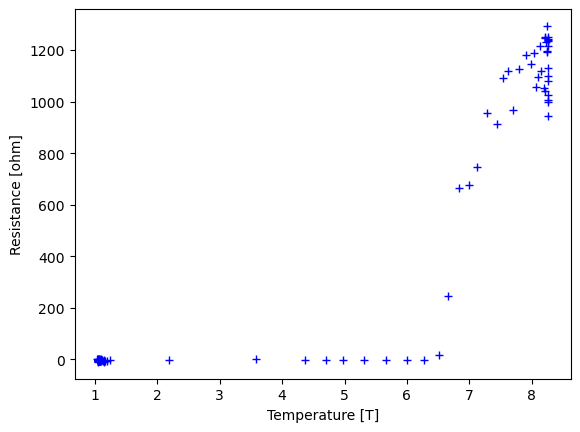

In [19]:
plt.plot(Temp[1500:1600], v_s[1500:1600]/curr[1500:1600]/9, 'b+') #zoom in to extract the critical temperature
ax = plt.gca()
ax.set_xlabel('Temperature [T]')
ax.set_ylabel('Resistance [ohm]')

Text(0, 0.5, 'Resistance [ohm]')

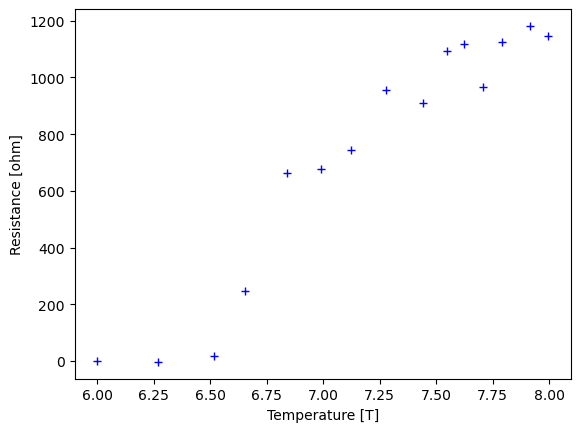

In [20]:
plt.plot(Temp[1525:1540], v_s[1525:1540]/curr[1525:1540]/9, 'b+') #zoom in to extract the critical temperature
ax = plt.gca()
ax.set_xlabel('Temperature [T]')
ax.set_ylabel('Resistance [ohm]')

2286.6740102834924
-1854.9879571834895
6.839209
7.705191


Text(0, 0.5, 'direvative')

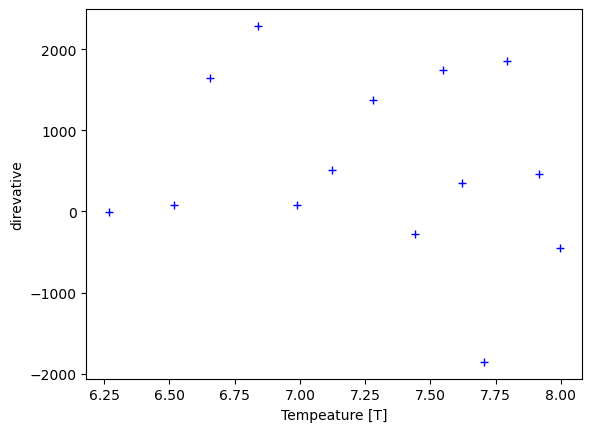

In [21]:
R = v_s[1525:1540]/curr[1525:1540]/9
T = Temp[1525:1540]
dR = np.diff(R,n=1) #for second order direvative n=2
dT = np.diff(T,n=1) #for second order direvative n=2

dRdT = dR/dT
print(np.max(dRdT))
print(np.min(dRdT))
print(T[np.argmax(dRdT)])
print(T[np.argmin(dRdT)])

plt.plot(T[0:-1], dRdT, 'b+') #for second order direvative mention -2
ax = plt.gca()
ax.set_xlabel('Tempeature [T]')
ax.set_ylabel('direvative')

In [9]:
import numpy as np 
hb = 1.05457182e-34 # m2 kg / s
kb =  1.380649e-23 # J K−1
Rm = 5000
Tc =  6

Lkin = hb * Rm / (np.pi*1.76*kb*Tc)

print(Lkin)
print('Lkin = {:.1f} pH/square'.format(Lkin*1e12))

1.1511955252512267e-09
Lkin = 1151.2 pH/square


In [23]:
print(np.pi)

3.141592653589793
